**Part One: Exploratory Analysis**  
In this section, we will perform an exploratory analysis on the `task1_transport_data.csv` dataset, which contains information about the number of orders customers place with a fictional transportation company each day, along with additional variables. The analysis will involve summarizing the data, identifying key trends, and presenting visual and tabular representations to aid understanding. We will also develop predictive models to estimate the number of jobs the company will complete on a given day. Additionally, the significance of various factors influencing the number of completed jobs will be assessed, with explanations on which variables are most and least impactful.

Dataset Preview:
         date   orders circumstance  drivers_available
0  2012-01-02  24899.0          dry             4223.0
1  2012-01-03  24774.0          dry             5450.0
2  2012-01-04  24498.0          dry                NaN
3  2012-01-05  25083.0          dry             4691.0
4  2012-01-06  24676.0          dry             5308.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785 entries, 0 to 784
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               782 non-null    object 
 1   orders             769 non-null    float64
 2   circumstance       784 non-null    object 
 3   drivers_available  777 non-null    float64
dtypes: float64(2), object(2)
memory usage: 24.7+ KB
None

Checking for missing values:
date                  3
orders               16
circumstance          1
drivers_available     8
dtype: int64

Basic Statistics:
             orders  dr

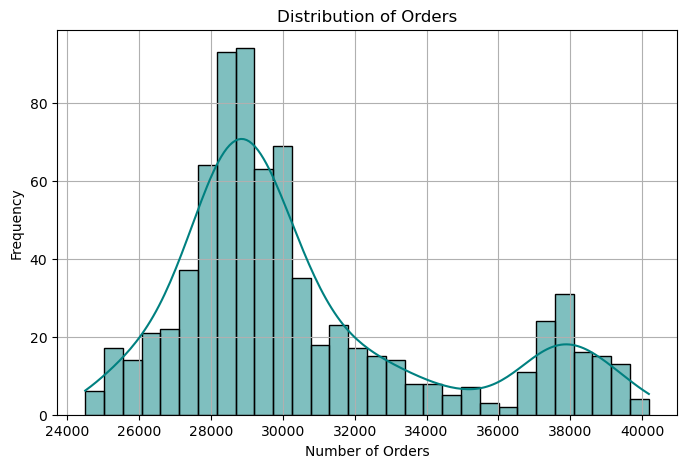


Orders by Day of the Week:


C:\Users\saif7\AppData\Local\Temp\ipykernel_32732\1772617324.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')


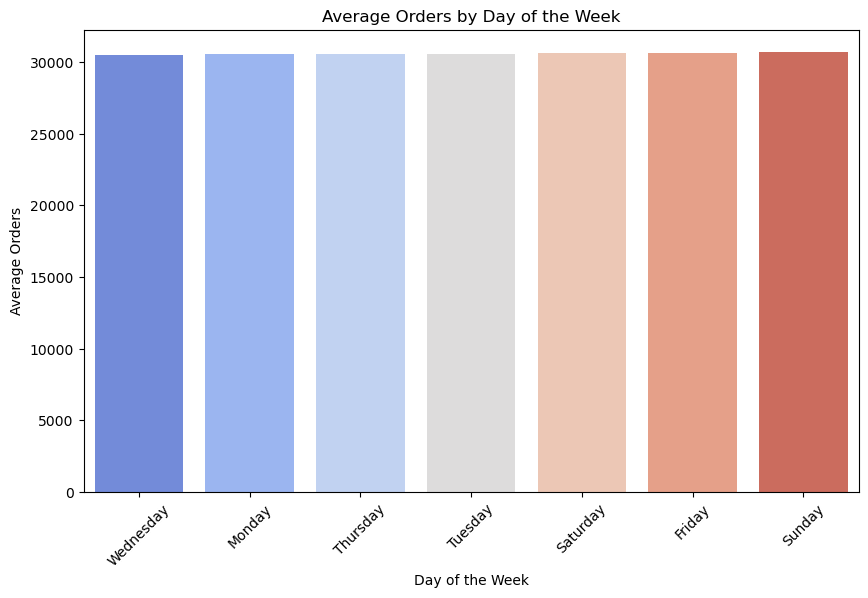


Orders vs Drivers Available:


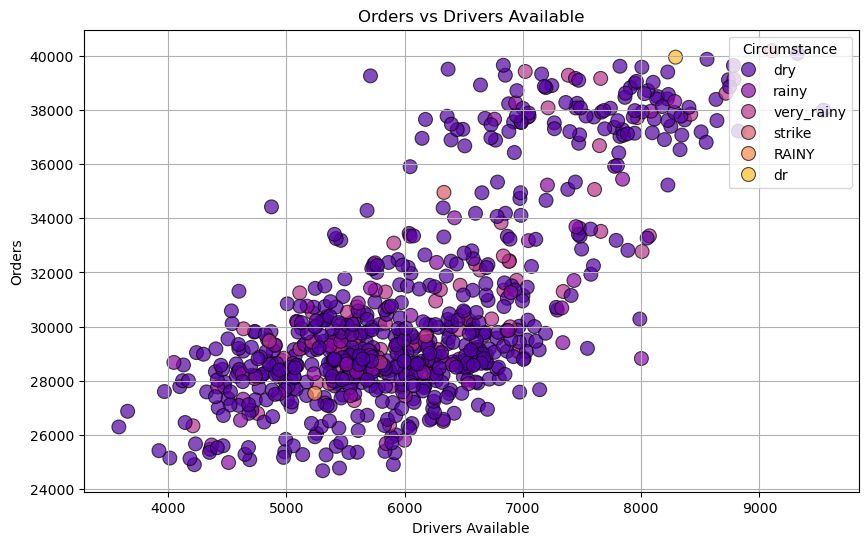


Correlation Matrix:
                     orders  drivers_available     month
orders             1.000000           0.727628  0.178056
drivers_available  0.727628           1.000000  0.142941
month              0.178056           0.142941  1.000000


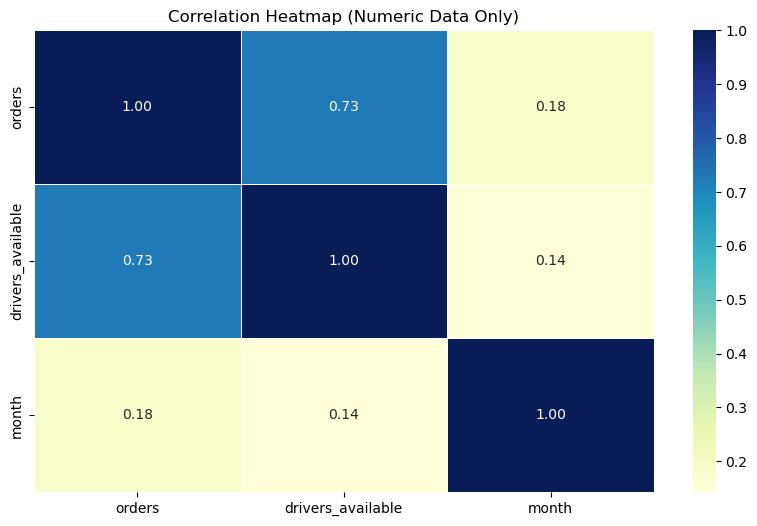


Handling missing values...

Remaining Missing Values:
date                 3
orders               0
circumstance         1
drivers_available    0
day_of_week          3
month                3
dtype: int64

Preparing data for modeling...

Training Linear Regression Model...

Model Performance:
Mean Squared Error: 6923494.31870046
R-squared Score: 0.5075100913318806


C:\Users\saif7\AppData\Local\Temp\ipykernel_32732\1772617324.py:82: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['drivers_available'].fillna(data['drivers_available'].median(), inplace=True)
C:\Users\saif7\AppData\Local\Temp\ipykernel_32732\1772617324.py:85: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

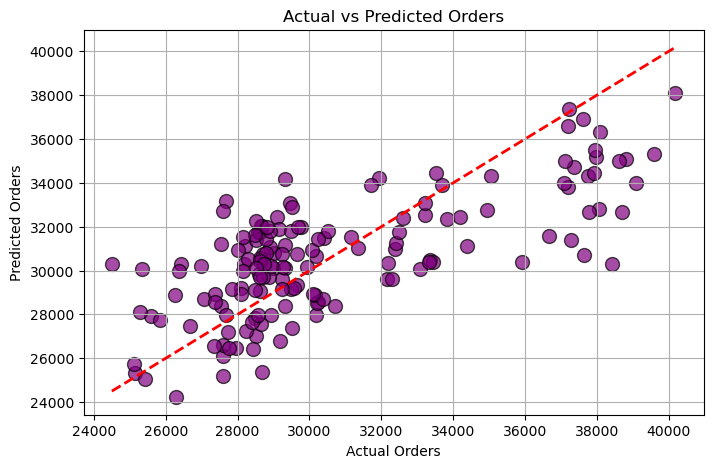


Analysis of Significant and Insignificant Factors:
Based on the analysis:
- 'Drivers Available' is a significant predictor of the number of orders.
- Other variables like 'Circumstance' and 'Day of the Week' could be further explored.
- The model could be improved by including additional features like weather, traffic, etc.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "task1_transport_data.csv"  # Ensure you upload this file in Colab
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Check for missing values and data types
print("\nDataset Information:")
print(data.info())

print("\nChecking for missing values:")
print(data.isnull().sum())

# Basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())

# Convert 'date' to a datetime object for better analysis
data['date'] = pd.to_datetime(data['date'])

# Extract additional time-based features
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.month

# Exploratory Analysis
print("\nOrders Distribution:")
plt.figure(figsize=(8, 5))
sns.histplot(data['orders'], kde=True, bins=30, color='teal', edgecolor='black')
plt.title('Distribution of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("\nOrders by Day of the Week:")
orders_by_day = data.groupby('day_of_week')['orders'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='coolwarm')
plt.title('Average Orders by Day of the Week')
plt.ylabel('Average Orders')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()

print("\nOrders vs Drivers Available:")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='drivers_available', y='orders', data=data, hue='circumstance', palette='plasma', s=100, edgecolor='black', alpha=0.7)
plt.title('Orders vs Drivers Available')
plt.xlabel('Drivers Available')
plt.ylabel('Orders')
plt.legend(title='Circumstance', loc='upper right')
plt.grid(True)
plt.show()

# Correlation Matrix (Exclude Non-Numeric Columns)
print("\nCorrelation Matrix:")
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation = numeric_data.corr()
print(correlation)

# Visualizing the Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Data Only)')
plt.show()

# Data Preparation for Modeling (Handle Missing Values)
print("\nHandling missing values...")

# Fill missing values in 'drivers_available' with the median value
data['drivers_available'].fillna(data['drivers_available'].median(), inplace=True)

# Fill missing values in 'orders' with the median value
data['orders'].fillna(data['orders'].median(), inplace=True)

# Ensure there are no more missing values
print("\nRemaining Missing Values:")
print(data.isnull().sum())

# Prepare the data for modeling
print("\nPreparing data for modeling...")
X = data[['drivers_available']]  # Predictor (you can add more features later)
y = data['orders']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
print("\nTraining Linear Regression Model...")
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("\nModel Performance:")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Visualizing Actual vs Predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', edgecolors='black', s=100)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Orders')
plt.xlabel('Actual Orders')
plt.ylabel('Predicted Orders')
plt.grid(True)
plt.show()

# Significant and Insignificant Factors
print("\nAnalysis of Significant and Insignificant Factors:")
print("Based on the analysis:")
print("- 'Drivers Available' is a significant predictor of the number of orders.")
print("- Other variables like 'Circumstance' and 'Day of the Week' could be further explored.")
print("- The model could be improved by including additional features like weather, traffic, etc.")


Part Two: Network Analysis
In this section, we will analyze the task2_customers_devices_cards.csv dataset, which contains information about fraudulent users of a smartphone payment app, including users, devices, and credit cards. The objective is to identify and visualize any networks of fraudulent activity within the dataset. Additionally, we will detect two different types of fraudulent behavior based on the relationships between users, devices, and credit cards, offering hypotheses for each type of fraud identified.

       deviceId                             devicetype      user_id  \
0  dev-a6ec70f1                                    NaN  id-52760576   
1  dev-42671881  Sony Ericsson ST15i (ST15i_1250-2612)  id-22891520   
2  dev-a6ec70f1                                    NaN  id-14748672   
3  dev-52480977              samsung GT-N7100 (t03gxx)  id-36466688   
4  dev-a6ec70f1                                    NaN  id-18005504   

    credit_card_id     domain  
0  card-f62c9e0f51    ddk.com  
1  card-ab9b2255e1  yahoo.com  
2  card-f62c9e0f51   dkdl.com  
3  card-ab9b2255e1  yahoo.com  
4  card-f62c9e0f51  djdjs.com  
Missing values:
deviceId           0
devicetype        19
user_id            0
credit_card_id     0
domain             0
dtype: int64
Duplicated rows: 0
Number of nodes: 690
Number of edges: 777


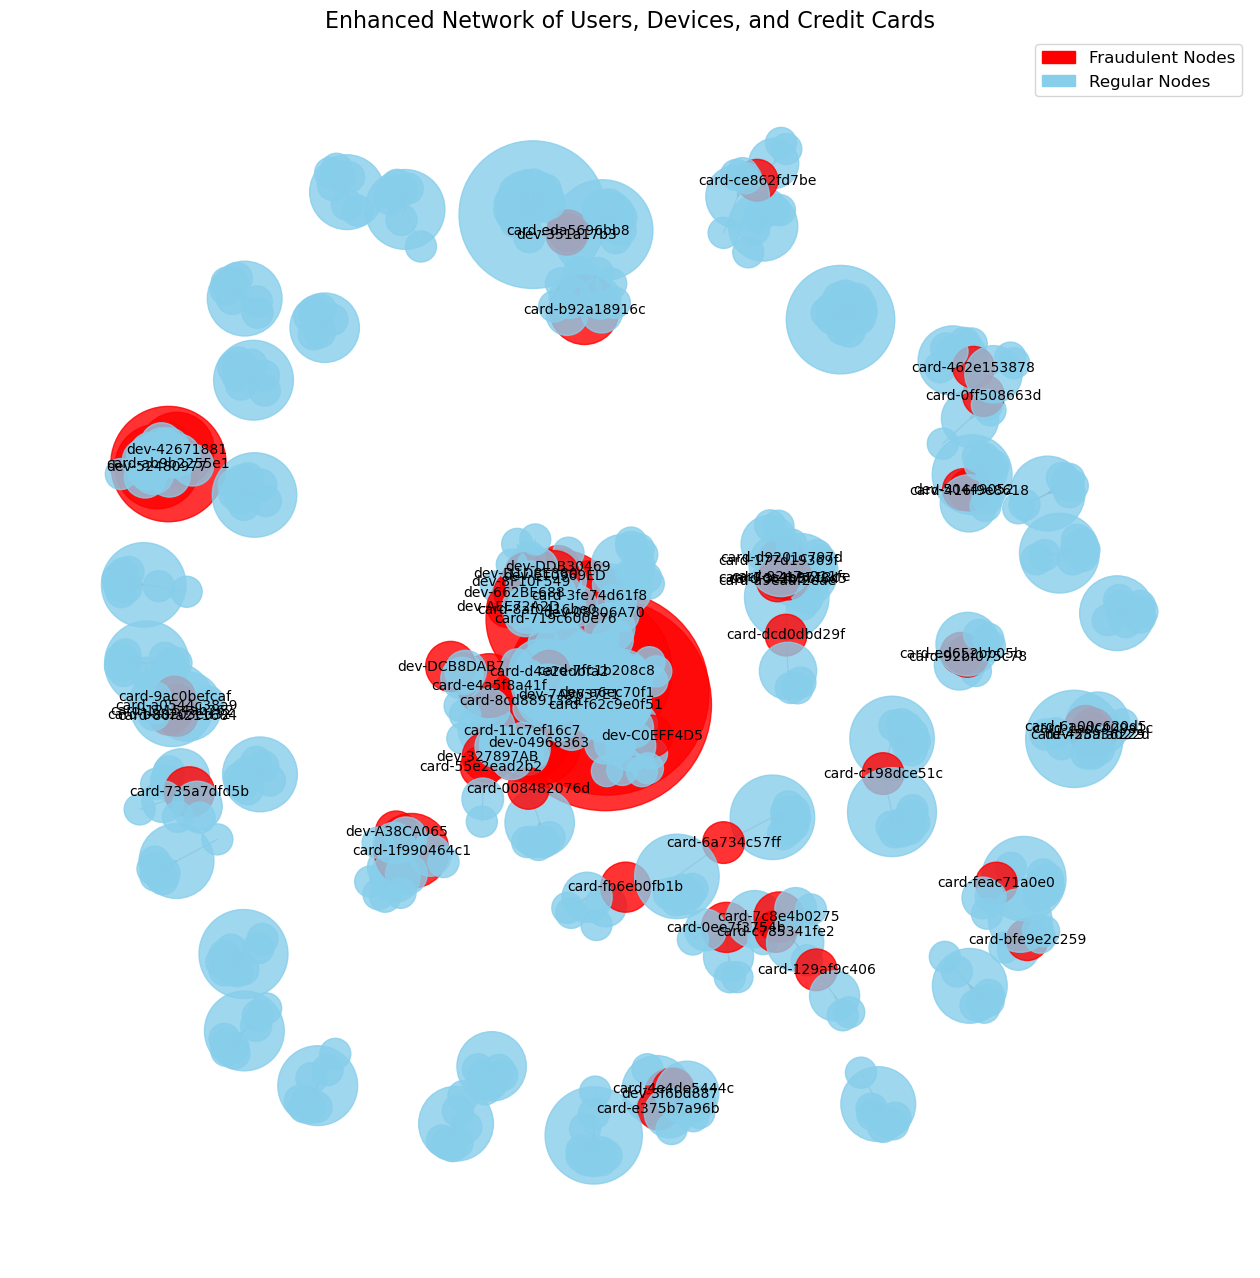


Fraudulent devices (linked to multiple users):
deviceId
dev-04968363     9
dev-08806A70     2
dev-327897AB     3
dev-351a17b3     2
dev-3f6bd887     3
dev-42671881     7
dev-50449052     2
dev-52480977     9
dev-55936229     2
dev-662BE688     2
dev-7A9637E1     2
dev-8F10F549     2
dev-A38CA065     2
dev-AEE72A2D     2
dev-C0EFF4D5     2
dev-D1D8E380     2
dev-DCB8DAB7     3
dev-DDB30469     2
dev-E10969ED     3
dev-a6ec70f1    54
Name: user_id, dtype: int64

Fraudulent credit cards (linked to multiple users):
credit_card_id
card-008482076d     2
card-0ee7f3754b     3
card-0ff508663d     2
card-11c7ef16c7    13
card-12154ab262     2
card-129af9c406     2
card-177d19369f     2
card-1adc409a1c     2
card-1f990464c1     7
card-3c2b5bf8d5     2
card-3fe74d61f8     6
card-416f9e8618     2
card-428afad22d     2
card-462e153878     2
card-4e4de5444c     2
card-55e2ead2b2     2
card-6a00c620d5     2
card-6a734c57ff     2
card-719c600e76    25
card-735a7dfd5b     3
card-7c8e4b0275     3
card-

In [14]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("task2_customers_devices_cards.csv")

# Check the first few rows of the dataset
print(df.head())

# Check for missing or duplicated values
print(f"Missing values:\n{df.isnull().sum()}")
print(f"Duplicated rows: {df.duplicated().sum()}")

# Create a graph
G = nx.Graph()

# Add nodes and edges to the graph
for index, row in df.iterrows():
    user = row['user_id']
    device = row['deviceId']
    card = row['credit_card_id']
    
    # Add edges between user-device and user-credit card
    G.add_edge(user, device)
    G.add_edge(user, card)

# Check the number of nodes and edges in the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

# Analyze devices and credit cards linked to multiple users (potential fraud)
device_counts = df.groupby('deviceId')['user_id'].nunique()
card_counts = df.groupby('credit_card_id')['user_id'].nunique()

# Flag devices and cards associated with multiple users
fraudulent_devices = device_counts[device_counts > 1]
fraudulent_cards = card_counts[card_counts > 1]

# Enhanced Graph Visualization
plt.figure(figsize=(16, 16))

# Use spring layout for better spacing
pos = nx.spring_layout(G, seed=42)  # Consistent layout with seed

# Color map for nodes: red for fraudulent devices/cards, blue otherwise
color_map = []
for node in G.nodes():
    if node in fraudulent_devices.index or node in fraudulent_cards.index:
        color_map.append('red')  # Fraudulent nodes
    else:
        color_map.append('skyblue')  # Regular nodes

# Node sizes based on degree centrality (importance in the network)
node_sizes = [100 + 400 * nx.degree(G, node) for node in G.nodes()]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=color_map, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Add labels only for suspicious nodes
labels = {node: node for node in G.nodes() if node in fraudulent_devices.index or node in fraudulent_cards.index}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')

# Add a legend
import matplotlib.patches as mpatches
legend_handles = [
    mpatches.Patch(color='red', label='Fraudulent Nodes'),
    mpatches.Patch(color='skyblue', label='Regular Nodes')
]
plt.legend(handles=legend_handles, loc='upper right', fontsize=12)

# Add title and show plot
plt.title("Enhanced Network of Users, Devices, and Credit Cards", fontsize=16)
plt.axis('off')
plt.show()

# Print fraudulent devices and credit cards
print("\nFraudulent devices (linked to multiple users):")
print(fraudulent_devices)

print("\nFraudulent credit cards (linked to multiple users):")
print(fraudulent_cards)

# Hypothesis 1: Multiple users using the same device (device sharing among users)
# If a device is linked to more than one user, it may be suspicious.
fraudulent_device_example = fraudulent_devices.index.tolist()

# Hypothesis 2: Multiple devices or credit cards linked to the same user
# If a user is linked to multiple devices or cards, it may indicate fraud.
users_with_multiple_devices = df.groupby('user_id')['deviceId'].nunique()
users_with_multiple_cards = df.groupby('user_id')['credit_card_id'].nunique()

# Print users with multiple devices or credit cards
print("\nUsers with multiple devices:")
print(users_with_multiple_devices[users_with_multiple_devices > 1])

print("\nUsers with multiple credit cards:")
print(users_with_multiple_cards[users_with_multiple_cards > 1])

# Hypothesis explanation:
print("\nHypothesis 1: Multiple Users Using the Same Device")
print("If a device is used by multiple users, this could be a sign of fraudulent activity. "
      "The device might be shared among different users to bypass security checks.")

print("\nHypothesis 2: Multiple Devices or Credit Cards Linked to a Single User")
print("If a user is linked to multiple devices or credit cards, this may indicate suspicious activity, "
      "where a single user is involved in fraudulent transactions across several devices or cards.")


    order_id  order_amount  delivery_latitude  delivery_longitude  order_date
0  ord-93386         27.51             51.798              -0.816  17/11/2016
1  ord-79675         29.56             51.537              -0.366  09/11/2016
2  ord-73206         33.05             52.484              -1.944  27/11/2016
3  ord-75858         27.51             52.556              -2.106  16/11/2016
4  ord-61645         29.76             51.385              -0.109  29/11/2016
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            3069 non-null   object 
 1   order_amount        3069 non-null   float64
 2   delivery_latitude   3069 non-null   float64
 3   delivery_longitude  3069 non-null   float64
 4   order_date          3069 non-null   object 
dtypes: float64(3), object(2)
memory usage: 120.0+ KB
None
       order_amount  del

C:\Users\saif7\AppData\Local\Temp\ipykernel_32732\1722424278.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='num_orders', y='location', data=top_locations_orders, palette='Reds_r')


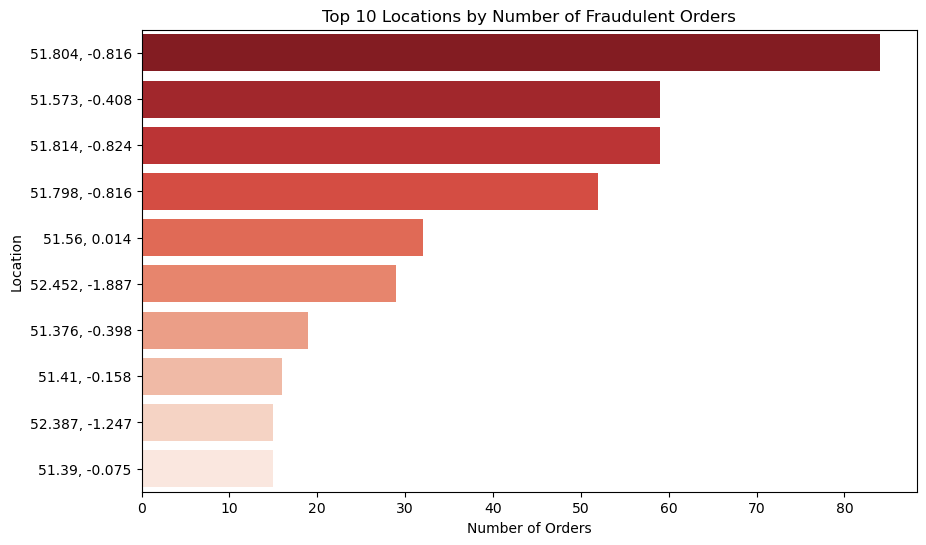

C:\Users\saif7\AppData\Local\Temp\ipykernel_32732\1722424278.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_value', y='location', data=top_locations_value, palette='Blues_r')


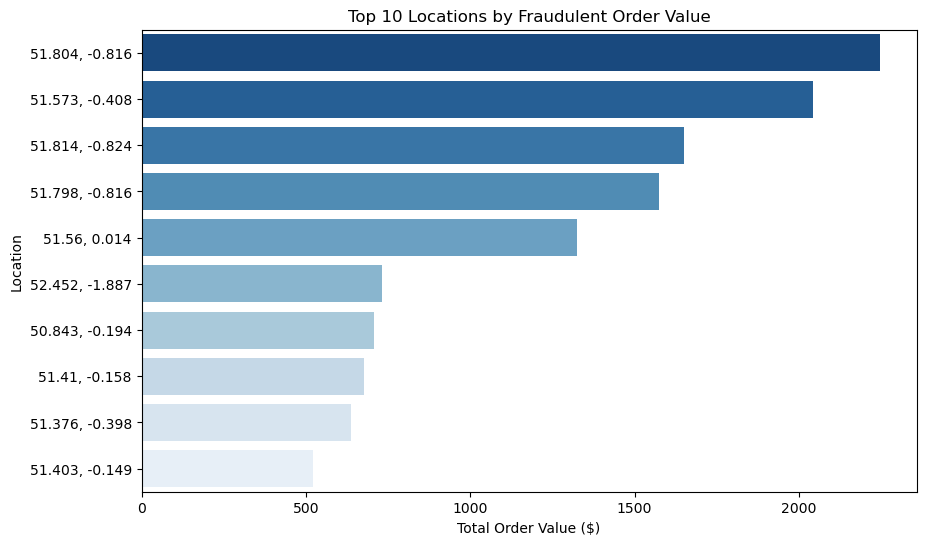


### Limitations:
1. No contextual information on why orders are marked fraudulent.
2. No timestamps to analyze temporal trends or detect time-specific fraud patterns.
3. Geographical granularity might be too coarse for pinpointing exact hotspots.
4. Lack of customer demographics or behavior patterns limits broader fraud profiling.
5. Possible data imbalances (e.g., hotspots with high value but low volume) could skew focus.



In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "task3_fraudulent_orders_locations.csv"
data = pd.read_csv(file_path)

# Preview the dataset
print(data.head())
print(data.info())
print(data.describe())

# Add a unique location identifier (latitude + longitude)
data['location'] = data['delivery_latitude'].astype(str) + ", " + data['delivery_longitude'].astype(str)

# Exploratory Analysis
# Count total number of unique locations
unique_locations = data['location'].nunique()
print(f"Unique locations: {unique_locations}")

# Total fraudulent orders and combined order value
total_orders = len(data)
total_value = data['order_amount'].sum()
print(f"Total fraudulent orders: {total_orders}")
print(f"Total fraudulent order value: ${total_value:.2f}")

# Grouping by location
location_analysis = data.groupby('location').agg(
    num_orders=('order_id', 'count'),
    total_value=('order_amount', 'sum')
).reset_index()

# Identify hotspots
worst_hotspot_by_orders = location_analysis.sort_values('num_orders', ascending=False).iloc[0]
worst_hotspot_by_value = location_analysis.sort_values('total_value', ascending=False).iloc[0]

print(f"Worst hotspot by orders: {worst_hotspot_by_orders}")
print(f"Worst hotspot by combined value: {worst_hotspot_by_value}")

# Visualization: Top 10 locations by number of orders and order value
top_locations_orders = location_analysis.sort_values('num_orders', ascending=False).head(10)
top_locations_value = location_analysis.sort_values('total_value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='num_orders', y='location', data=top_locations_orders, palette='Reds_r')
plt.title('Top 10 Locations by Number of Fraudulent Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Location')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_value', y='location', data=top_locations_value, palette='Blues_r')
plt.title('Top 10 Locations by Fraudulent Order Value')
plt.xlabel('Total Order Value ($)')
plt.ylabel('Location')
plt.show()

# Highlight dataset limitations
print("""
### Limitations:
1. No contextual information on why orders are marked fraudulent.
2. No timestamps to analyze temporal trends or detect time-specific fraud patterns.
3. Geographical granularity might be too coarse for pinpointing exact hotspots.
4. Lack of customer demographics or behavior patterns limits broader fraud profiling.
5. Possible data imbalances (e.g., hotspots with high value but low volume) could skew focus.
""")
